In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('fraud-detection.csv')

In [59]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,100165.000000,1.001650e+05,100165,1.001650e+05,1.001650e+05,100165,1.001650e+05,1.001650e+05,100165.000000
unique,NaN,NaN,NaN,100165,NaN,NaN,51607,NaN,NaN,NaN
top,NaN,NaN,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,78,NaN,NaN,NaN
mean,8.502112,1.538551,1.736458e+05,NaN,8.801756e+05,8.965348e+05,NaN,8.810839e+05,1.184639e+06,0.001158
std,1.825055,1.506957,3.442910e+05,NaN,2.676095e+06,2.714232e+06,NaN,2.402387e+06,2.802252e+06,0.034011
min,1.000000,0.000000,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,0.000000,9.970160e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,2.000000,5.285289e+04,NaN,2.008500e+04,0.000000e+00,NaN,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,2.000000,2.119434e+05,NaN,1.910560e+05,2.154246e+05,NaN,5.891912e+05,1.061043e+06,0.000000


In [37]:
lookup=dict(zip(df.type.unique(),range(0,df.type.nunique())))
lookup

{'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}

In [38]:
df['type']=df.type.replace(lookup)

In [48]:
X=df[[col for col in df.columns if col not in ['nameOrig','nameDest']]]
Y=df['isFraud']

In [49]:
type(Y)

pandas.core.series.Series

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
sacler=StandardScaler()
standard_x=sacler.fit_transform(x_train)
standard_x_test=sacler.fit_transform(x_test)

In [52]:
model=KNeighborsClassifier()
model.fit(standard_x,y_train)
y_predict=model.predict(standard_x_test)

In [53]:
acc_score=accuracy_score(y_test,y_predict)

In [54]:
acc_score

1.0

In [61]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[20007,     0],
       [    0,    26]], dtype=int64)

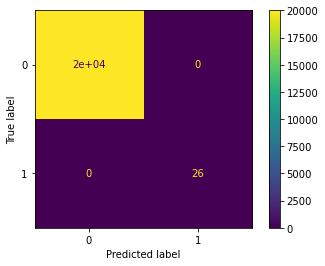

In [64]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()